Author: Kiersten Johns

# Imports:

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [52]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

clean = pd.read_csv('../1_data/cleaned_data_31OCT.csv')
clean.head()

,date_of_incident,date_of_death,age,gender,race,latino,manner_of_death,primary_cause,primary_cause_line_a,primary_cause_line_b,primary_cause_line_c,secondary_cause,gun_related,opioid_related,cold_related,heat_related,commissioner_district,incident_city,incident_zip_code,longitude,latitude,residence_city,residence_zip,chicago_community_area,covid_related,age_range,death_date,death_time,death_day,inc_date,inc_time,inc_day
0,2023-10-24 00:43:00,2023-10-25 00:11:00,22.0,1,Black,0,ACCIDENT,MULTIPLE BLUNT FORCE INJURIES. MOTOR VEHICLE C...,MULTIPLE BLUNT FORCE INJURIES,MOTOR VEHICLE COLLISION,no_text,no_text,0,0,0,0,1.0,CHICAGO,60644,-87.754890,41.872093,Indianapolis,46224,AUSTIN,0,15-24,2023-10-25,00:11:00,Wednesday,2023-10-24,00:43:00,Tuesday
1,2023-10-24 22:30:00,2023-10-24 21:51:00,35.0,0,Black,0,HOMICIDE,MULTIPLE GUNSHOT WOUNDS,MULTIPLE GUNSHOT WOUNDS,no_text,no_text,no_text,1,0,0,0,4.0,CHICAGO,60649,-87.558292,41.759939,Chicago,60633,SOUTH SHORE,0,25-64,2023-10-24,21:51:00,Tuesday,2023-10-24,22:30:00,Tuesday
2,2023-10-24 21:18:00,2023-10-24 20:36:00,54.0,0,White,0,SUICIDE,GUNSHOT WOUND OF HEAD,GUNSHOT WOUND OF HEAD,no_text,no_text,no_text,1,0,0,0,12.0,CHICAGO,60634,-87.780811,41.955351,Chicago,60634,PORTAGE PARK,0,25-64,2023-10-24,20:36:00,Tuesday,2023-10-24,21:18:00,Tuesday
3,2023-10-24 07:48:00,2023-10-24 07:16:00,19.0,0,Black,0,HOMICIDE,MULTIPLE GUNSHOT WOUNDS,MULTIPLE GUNSHOT WOUNDS,no_text,no_text,no_text,1,0,0,0,3.0,CHICAGO,60649,-87.584359,41.771935,no_text,no_text,SOUTH SHORE,0,15-24,2023-10-24,07:16:00,Tuesday,2023-10-24,07:48:00,Tuesday
4,2023-10-23 22:21:00,2023-10-23 21:29:00,41.0,0,Black,0,HOMICIDE,MULTIPLE GUNSHOT WOUNDS,MULTIPLE GUNSHOT WOUNDS,no_text,no_text,no_text,1,0,0,0,2.0,CHICAGO,60636,-87.663792,41.782286,Chicago,60636,WEST ENGLEWOOD,0,25-64,2023-10-23,21:29:00,Monday,2023-10-23,22:21:00,Monday


# Non-NLP Classification (no text)

In [53]:
X = clean[['age', 'gender', 'race', 'gun_related', 'opioid_related', 'cold_related', 'heat_related', 'covid_related']]
y = clean['manner_of_death']

In [54]:
X = pd.get_dummies(X, columns=['race'], drop_first=True)

In [55]:
X.shape

(37151, 12)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1002)

ss = StandardScaler()

X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

### LogReg

In [57]:
log = LogisticRegression()

log.fit(X_train_ss, y_train)


print(log.score(X_train_ss, y_train))
print(log.score(X_test_ss, y_test))

0.8559020923805764
0.8545434969853575


/Users/kierstensouth/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### KNN

In [58]:
kn = KNeighborsClassifier()

kn.fit(X_train_ss, y_train)

print(kn.score(X_train_ss, y_train))
print(kn.score(X_test_ss, y_test))

0.8639055378099989
0.8532515073212747


### Random Forest

In [59]:
rando = RandomForestClassifier()

rando.fit(X_train_ss, y_train)

print(rando.score(X_train_ss, y_train))
print(rando.score(X_test_ss, y_test))

0.8766105588055845
0.8622954349698536


### AdaBoost

In [60]:
ab = AdaBoostClassifier()

ab.fit(X_train_ss, y_train)

print(ab.score(X_train_ss, y_train))
print(ab.score(X_test_ss, y_test))

0.8599217600401967
0.8597114556416882


# NLP Classification

In [61]:
clean.head()

,date_of_incident,date_of_death,age,gender,race,latino,manner_of_death,primary_cause,primary_cause_line_a,primary_cause_line_b,primary_cause_line_c,secondary_cause,gun_related,opioid_related,cold_related,heat_related,commissioner_district,incident_city,incident_zip_code,longitude,latitude,residence_city,residence_zip,chicago_community_area,covid_related,age_range,death_date,death_time,death_day,inc_date,inc_time,inc_day
0,2023-10-24 00:43:00,2023-10-25 00:11:00,22.0,1,Black,0,ACCIDENT,MULTIPLE BLUNT FORCE INJURIES. MOTOR VEHICLE C...,MULTIPLE BLUNT FORCE INJURIES,MOTOR VEHICLE COLLISION,no_text,no_text,0,0,0,0,1.0,CHICAGO,60644,-87.754890,41.872093,Indianapolis,46224,AUSTIN,0,15-24,2023-10-25,00:11:00,Wednesday,2023-10-24,00:43:00,Tuesday
1,2023-10-24 22:30:00,2023-10-24 21:51:00,35.0,0,Black,0,HOMICIDE,MULTIPLE GUNSHOT WOUNDS,MULTIPLE GUNSHOT WOUNDS,no_text,no_text,no_text,1,0,0,0,4.0,CHICAGO,60649,-87.558292,41.759939,Chicago,60633,SOUTH SHORE,0,25-64,2023-10-24,21:51:00,Tuesday,2023-10-24,22:30:00,Tuesday
2,2023-10-24 21:18:00,2023-10-24 20:36:00,54.0,0,White,0,SUICIDE,GUNSHOT WOUND OF HEAD,GUNSHOT WOUND OF HEAD,no_text,no_text,no_text,1,0,0,0,12.0,CHICAGO,60634,-87.780811,41.955351,Chicago,60634,PORTAGE PARK,0,25-64,2023-10-24,20:36:00,Tuesday,2023-10-24,21:18:00,Tuesday
3,2023-10-24 07:48:00,2023-10-24 07:16:00,19.0,0,Black,0,HOMICIDE,MULTIPLE GUNSHOT WOUNDS,MULTIPLE GUNSHOT WOUNDS,no_text,no_text,no_text,1,0,0,0,3.0,CHICAGO,60649,-87.584359,41.771935,no_text,no_text,SOUTH SHORE,0,15-24,2023-10-24,07:16:00,Tuesday,2023-10-24,07:48:00,Tuesday
4,2023-10-23 22:21:00,2023-10-23 21:29:00,41.0,0,Black,0,HOMICIDE,MULTIPLE GUNSHOT WOUNDS,MULTIPLE GUNSHOT WOUNDS,no_text,no_text,no_text,1,0,0,0,2.0,CHICAGO,60636,-87.663792,41.782286,Chicago,60636,WEST ENGLEWOOD,0,25-64,2023-10-23,21:29:00,Monday,2023-10-23,22:21:00,Monday


In [62]:
xy = clean[['primary_cause', 'manner_of_death']]
xy.head()

,primary_cause,manner_of_death
0,MULTIPLE BLUNT FORCE INJURIES. MOTOR VEHICLE C...,ACCIDENT
1,MULTIPLE GUNSHOT WOUNDS,HOMICIDE
2,GUNSHOT WOUND OF HEAD,SUICIDE
3,MULTIPLE GUNSHOT WOUNDS,HOMICIDE
4,MULTIPLE GUNSHOT WOUNDS,HOMICIDE


In [63]:
xy['manner_of_death'].value_counts()

ACCIDENT    25003
HOMICIDE     7747
SUICIDE      4401
Name: manner_of_death, dtype: int64

In [64]:
xy['manner_of_death'] = xy['manner_of_death'].map({'ACCIDENT': 1, 'HOMICIDE': 0, 'SUICIDE': 0})

/var/folders/w4/lpzl5f8j3kx7kch0q9wglx4c0000gn/T/ipykernel_66584/920047631.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xy['manner_of_death'] = xy['manner_of_death'].map({'ACCIDENT': 1, 'HOMICIDE': 0, 'SUICIDE': 0})


In [65]:
xy.head()

,primary_cause,manner_of_death
0,MULTIPLE BLUNT FORCE INJURIES. MOTOR VEHICLE C...,1
1,MULTIPLE GUNSHOT WOUNDS,0
2,GUNSHOT WOUND OF HEAD,0
3,MULTIPLE GUNSHOT WOUNDS,0
4,MULTIPLE GUNSHOT WOUNDS,0


In [66]:
xy.manner_of_death.value_counts()

1    25003
0    12148
Name: manner_of_death, dtype: int64

In [67]:
X = xy['primary_cause']
y = xy['manner_of_death']

In [68]:
X.shape

(37151,)

In [69]:
X.head()

0    MULTIPLE BLUNT FORCE INJURIES. MOTOR VEHICLE C...
1                              MULTIPLE GUNSHOT WOUNDS
2                                GUNSHOT WOUND OF HEAD
3                              MULTIPLE GUNSHOT WOUNDS
4                              MULTIPLE GUNSHOT WOUNDS
Name: primary_cause, dtype: object

In [70]:
y.shape

(37151,)

In [71]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: manner_of_death, dtype: int64

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1002)

In [73]:
1 - y_train.mean()

0.326490327674694

In [74]:
print(X_train.shape)
# print(X_test.shape)
print(y_train.shape)
# print(y_test.shape)

(27863,)
(27863,)


### CV and LogReg

In [75]:
cv = CountVectorizer()

X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

In [76]:
lr = LogisticRegression()

lr.fit(X_train_cv, y_train)

print(lr.score(X_train_cv, y_train))
print(lr.score(X_test_cv, y_test))

0.9768151311775473
0.9757751937984496


In [77]:
preds = lr.predict(X_test_cv)

In [78]:
confusion_matrix(y_test, preds)

array([[2890,  161],
       [  64, 6173]])

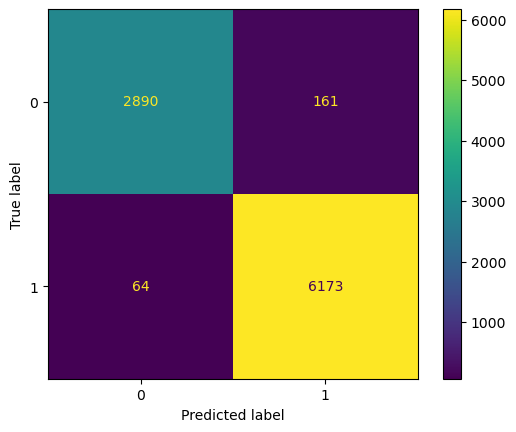

In [79]:
ConfusionMatrixDisplay.from_estimator(lr, X_test_cv, y_test, cmap='viridis');

In [80]:
results = pd.DataFrame({
    'actual': y_test,
    'predicted': preds
})

In [81]:
wrongs = results[results.actual != results.predicted]
wrongs

,actual,predicted
32167,1,0
9065,1,0
15786,0,1
1117,0,1
31342,0,1
36404,0,1
13316,0,1
13998,0,1
25360,0,1
24840,0,1


### TF-IDF and LogReg

In [82]:
tf = TfidfVectorizer()

X_train_tf = tf.fit_transform(X_train)
X_test_tf = tf.transform(X_test)

In [83]:
lr = LogisticRegression()

lr.fit(X_train_tf, y_train)

print(lr.score(X_train_tf, y_train))
print(lr.score(X_test_tf, y_test))

0.9745540681190109
0.9741602067183462


### CV and MNB

In [84]:
cvec = CountVectorizer()

X_train_cvec = cvec.fit_transform(X_train)
X_test_cvec = cvec.transform(X_test)

In [85]:
mnb = MultinomialNB()

mnb.fit(X_train_cvec, y_train)

print(lr.score(X_train_cvec, y_train))
print(lr.score(X_test_cvec, y_test))

0.9725083443993827
0.9712532299741602


### TF-IFD and MNB

In [86]:
tfv = TfidfVectorizer()

X_train_tfv = tfv.fit_transform(X_train)
X_test_tfv = tfv.transform(X_test)

In [87]:
mnb = MultinomialNB()

mnb.fit(X_train_tfv, y_train)

print(lr.score(X_train_tfv, y_train))
print(lr.score(X_test_tfv, y_test))

0.9745540681190109
0.9741602067183462


### NLP w/ Primary and Secondary

In [88]:
clean.head(1)

,date_of_incident,date_of_death,age,gender,race,latino,manner_of_death,primary_cause,primary_cause_line_a,primary_cause_line_b,primary_cause_line_c,secondary_cause,gun_related,opioid_related,cold_related,heat_related,commissioner_district,incident_city,incident_zip_code,longitude,latitude,residence_city,residence_zip,chicago_community_area,covid_related,age_range,death_date,death_time,death_day,inc_date,inc_time,inc_day
0,2023-10-24 00:43:00,2023-10-25 00:11:00,22.0,1,Black,0,ACCIDENT,MULTIPLE BLUNT FORCE INJURIES. MOTOR VEHICLE C...,MULTIPLE BLUNT FORCE INJURIES,MOTOR VEHICLE COLLISION,no_text,no_text,0,0,0,0,1.0,CHICAGO,60644,-87.75489,41.872093,Indianapolis,46224,AUSTIN,0,15-24,2023-10-25,00:11:00,Wednesday,2023-10-24,00:43:00,Tuesday


In [89]:
new_df = clean[['primary_cause', 'secondary_cause', 'manner_of_death']]
new_df.head()

,primary_cause,secondary_cause,manner_of_death
0,MULTIPLE BLUNT FORCE INJURIES. MOTOR VEHICLE C...,no_text,ACCIDENT
1,MULTIPLE GUNSHOT WOUNDS,no_text,HOMICIDE
2,GUNSHOT WOUND OF HEAD,no_text,SUICIDE
3,MULTIPLE GUNSHOT WOUNDS,no_text,HOMICIDE
4,MULTIPLE GUNSHOT WOUNDS,no_text,HOMICIDE


In [90]:
new_df['both'] = new_df['primary_cause'] + new_df['secondary_cause']
new_df.head(1)

/var/folders/w4/lpzl5f8j3kx7kch0q9wglx4c0000gn/T/ipykernel_66584/1066797446.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['both'] = new_df['primary_cause'] + new_df['secondary_cause']


,primary_cause,secondary_cause,manner_of_death,both
0,MULTIPLE BLUNT FORCE INJURIES. MOTOR VEHICLE C...,no_text,ACCIDENT,MULTIPLE BLUNT FORCE INJURIES. MOTOR VEHICLE C...


In [91]:
new_df['manner_of_death'] = new_df['manner_of_death'].map({'ACCIDENT': 1, 'HOMICIDE': 0, 'SUICIDE': 0})

/var/folders/w4/lpzl5f8j3kx7kch0q9wglx4c0000gn/T/ipykernel_66584/1713571186.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['manner_of_death'] = new_df['manner_of_death'].map({'ACCIDENT': 1, 'HOMICIDE': 0, 'SUICIDE': 0})


In [92]:
new_df.manner_of_death.value_counts()

1    25003
0    12148
Name: manner_of_death, dtype: int64

In [93]:
X = new_df['both']
y = new_df['manner_of_death']

In [94]:
1 - y.mean(), y.mean()

(0.32698985222470456, 0.6730101477752954)

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1002)

In [96]:
cv = CountVectorizer()

X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

In [97]:
lr = LogisticRegression()

lr.fit(X_train_cv, y_train)

print(lr.score(X_train_cv, y_train))
print(lr.score(X_test_cv, y_test))

0.9790044144564476
0.9771748492678726


/Users/kierstensouth/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Data w/ Clusters

In [98]:
clusters = pd.read_csv('../1_data/df_with_topics.csv')
clusters.head()

,date_of_incident,date_of_death,age,gender,race,latino,manner_of_death,primary_cause,primary_cause_line_a,primary_cause_line_b,primary_cause_line_c,secondary_cause,gun_related,opioid_related,cold_related,heat_related,commissioner_district,incident_city,incident_zip_code,longitude,latitude,residence_city,residence_zip,chicago_community_area,covid_related,age_range,death_date,death_time,death_day,inc_date,inc_time,inc_day,long_topic,best_topic_num,best_topic_name,best_topic_perc
0,2023-10-24 00:43:00,2023-10-25 00:11:00,22.0,1,Black,0,ACCIDENT,MULTIPLE BLUNT FORCE INJURIES. MOTOR VEHICLE C...,MULTIPLE BLUNT FORCE INJURIES,MOTOR VEHICLE COLLISION,no_text,no_text,0,0,0,0,1.0,CHICAGO,60644,-87.754890,41.872093,Indianapolis,46224,AUSTIN,0,15-24,2023-10-25,00:11:00,Wednesday,2023-10-24,00:43:00,Tuesday,"[(0, 0.0100428155), (1, 0.01559641), (2, 0.948...",2,vehicle_collision,0.948506
1,2023-10-24 22:30:00,2023-10-24 21:51:00,35.0,0,Black,0,HOMICIDE,MULTIPLE GUNSHOT WOUNDS,MULTIPLE GUNSHOT WOUNDS,no_text,no_text,no_text,1,0,0,0,4.0,CHICAGO,60649,-87.558292,41.759939,Chicago,60633,SOUTH SHORE,0,25-64,2023-10-24,21:51:00,Tuesday,2023-10-24,22:30:00,Tuesday,"[(0, 0.018974014), (1, 0.91878027), (2, 0.0133...",1,gunshot_wounds_fall,0.918780
2,2023-10-24 21:18:00,2023-10-24 20:36:00,54.0,0,White,0,SUICIDE,GUNSHOT WOUND OF HEAD,GUNSHOT WOUND OF HEAD,no_text,no_text,no_text,1,0,0,0,12.0,CHICAGO,60634,-87.780811,41.955351,Chicago,60634,PORTAGE PARK,0,25-64,2023-10-24,20:36:00,Tuesday,2023-10-24,21:18:00,Tuesday,"[(0, 0.90828776), (1, 0.029466497), (2, 0.0133...",0,one_gunshot_wound,0.908288
3,2023-10-24 07:48:00,2023-10-24 07:16:00,19.0,0,Black,0,HOMICIDE,MULTIPLE GUNSHOT WOUNDS,MULTIPLE GUNSHOT WOUNDS,no_text,no_text,no_text,1,0,0,0,3.0,CHICAGO,60649,-87.584359,41.771935,no_text,no_text,SOUTH SHORE,0,15-24,2023-10-24,07:16:00,Tuesday,2023-10-24,07:48:00,Tuesday,"[(0, 0.018974014), (1, 0.91878027), (2, 0.0133...",1,gunshot_wounds_fall,0.918780
4,2023-10-23 22:21:00,2023-10-23 21:29:00,41.0,0,Black,0,HOMICIDE,MULTIPLE GUNSHOT WOUNDS,MULTIPLE GUNSHOT WOUNDS,no_text,no_text,no_text,1,0,0,0,2.0,CHICAGO,60636,-87.663792,41.782286,Chicago,60636,WEST ENGLEWOOD,0,25-64,2023-10-23,21:29:00,Monday,2023-10-23,22:21:00,Monday,"[(0, 0.018974014), (1, 0.91878027), (2, 0.0133...",1,gunshot_wounds_fall,0.918780


In [99]:
clusters.best_topic_num.value_counts()

3    14362
1    10134
0     4872
2     4477
4     3306
Name: best_topic_num, dtype: int64

In [100]:
clusters.best_topic_name.value_counts()

drug_overdose          14362
gunshot_wounds_fall    10134
one_gunshot_wound       4872
vehicle_collision       4477
miscellaneous           3306
Name: best_topic_name, dtype: int64

0 - one_gunshot_wound

1 - gunshot_wounds_fall

2 - vehicle_collision

3 - drug_overdose

4 - miscellaneous

In [101]:
clusters['manner_of_death'] = clusters['manner_of_death'].map({'ACCIDENT': 1, 'HOMICIDE': 0, 'SUICIDE': 0})
clusters.head()

,date_of_incident,date_of_death,age,gender,race,latino,manner_of_death,primary_cause,primary_cause_line_a,primary_cause_line_b,primary_cause_line_c,secondary_cause,gun_related,opioid_related,cold_related,heat_related,commissioner_district,incident_city,incident_zip_code,longitude,latitude,residence_city,residence_zip,chicago_community_area,covid_related,age_range,death_date,death_time,death_day,inc_date,inc_time,inc_day,long_topic,best_topic_num,best_topic_name,best_topic_perc
0,2023-10-24 00:43:00,2023-10-25 00:11:00,22.0,1,Black,0,1,MULTIPLE BLUNT FORCE INJURIES. MOTOR VEHICLE C...,MULTIPLE BLUNT FORCE INJURIES,MOTOR VEHICLE COLLISION,no_text,no_text,0,0,0,0,1.0,CHICAGO,60644,-87.754890,41.872093,Indianapolis,46224,AUSTIN,0,15-24,2023-10-25,00:11:00,Wednesday,2023-10-24,00:43:00,Tuesday,"[(0, 0.0100428155), (1, 0.01559641), (2, 0.948...",2,vehicle_collision,0.948506
1,2023-10-24 22:30:00,2023-10-24 21:51:00,35.0,0,Black,0,0,MULTIPLE GUNSHOT WOUNDS,MULTIPLE GUNSHOT WOUNDS,no_text,no_text,no_text,1,0,0,0,4.0,CHICAGO,60649,-87.558292,41.759939,Chicago,60633,SOUTH SHORE,0,25-64,2023-10-24,21:51:00,Tuesday,2023-10-24,22:30:00,Tuesday,"[(0, 0.018974014), (1, 0.91878027), (2, 0.0133...",1,gunshot_wounds_fall,0.918780
2,2023-10-24 21:18:00,2023-10-24 20:36:00,54.0,0,White,0,0,GUNSHOT WOUND OF HEAD,GUNSHOT WOUND OF HEAD,no_text,no_text,no_text,1,0,0,0,12.0,CHICAGO,60634,-87.780811,41.955351,Chicago,60634,PORTAGE PARK,0,25-64,2023-10-24,20:36:00,Tuesday,2023-10-24,21:18:00,Tuesday,"[(0, 0.90828776), (1, 0.029466497), (2, 0.0133...",0,one_gunshot_wound,0.908288
3,2023-10-24 07:48:00,2023-10-24 07:16:00,19.0,0,Black,0,0,MULTIPLE GUNSHOT WOUNDS,MULTIPLE GUNSHOT WOUNDS,no_text,no_text,no_text,1,0,0,0,3.0,CHICAGO,60649,-87.584359,41.771935,no_text,no_text,SOUTH SHORE,0,15-24,2023-10-24,07:16:00,Tuesday,2023-10-24,07:48:00,Tuesday,"[(0, 0.018974014), (1, 0.91878027), (2, 0.0133...",1,gunshot_wounds_fall,0.918780
4,2023-10-23 22:21:00,2023-10-23 21:29:00,41.0,0,Black,0,0,MULTIPLE GUNSHOT WOUNDS,MULTIPLE GUNSHOT WOUNDS,no_text,no_text,no_text,1,0,0,0,2.0,CHICAGO,60636,-87.663792,41.782286,Chicago,60636,WEST ENGLEWOOD,0,25-64,2023-10-23,21:29:00,Monday,2023-10-23,22:21:00,Monday,"[(0, 0.018974014), (1, 0.91878027), (2, 0.0133...",1,gunshot_wounds_fall,0.918780


### Without dates / times / zipcodes

In [102]:
X = clusters[['gender', 'race', 'latino', 'gun_related', 'opioid_related', 'cold_related', 'heat_related', 'covid_related', 'age_range', 'best_topic_num']]
y = clusters['manner_of_death']

In [103]:
X.dtypes

gender             int64
race              object
latino             int64
gun_related        int64
opioid_related     int64
cold_related       int64
heat_related       int64
covid_related      int64
age_range         object
best_topic_num     int64
dtype: object

In [104]:
X = pd.get_dummies(X, columns=['race', 'age_range'], drop_first=True)

In [105]:
X.shape

(37151, 18)

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 1002)

> #### Log Reg

In [107]:
pipe = Pipeline([
    ('ss', StandardScaler()),
    ('lr', LogisticRegression())
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('ss', StandardScaler()), ('lr', LogisticRegression())])

In [108]:
print(pipe.score(X_train, y_train))
print(pipe.score(X_test, y_test))

0.8969242364425941
0.8982558139534884


> #### KNN

In [109]:
pipe = Pipeline([
    ('ss', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('ss', StandardScaler()), ('knn', KNeighborsClassifier())])

In [110]:
print(pipe.score(X_train, y_train))
print(pipe.score(X_test, y_test))

0.8996518680687651
0.8982558139534884


> #### Decision Tree

In [111]:
pipe = Pipeline([
    ('ss', StandardScaler()),
    ('dt', DecisionTreeClassifier())
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('ss', StandardScaler()), ('dt', DecisionTreeClassifier())])

In [112]:
print(pipe.score(X_train, y_train))
print(pipe.score(X_test, y_test))

0.9107777339123568
0.906223083548665


> #### Bagged Decision Tree

In [113]:
pipe = Pipeline([
    ('ss', StandardScaler()),
    ('bdt', BaggingClassifier())
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('ss', StandardScaler()), ('bdt', BaggingClassifier())])

In [114]:
print(pipe.score(X_train, y_train))
print(pipe.score(X_test, y_test))

0.9105982844632667
0.9059000861326443


> #### Random Forrest

In [115]:
pipe = Pipeline([
    ('ss', StandardScaler()),
    ('rf', RandomForestClassifier())
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('ss', StandardScaler()), ('rf', RandomForestClassifier())])

In [116]:
print(pipe.score(X_train, y_train))
print(pipe.score(X_test, y_test))

0.9107777339123568
0.9066537467700259


> #### Ada Boost

In [117]:
pipe = Pipeline([
    ('ss', StandardScaler()),
    ('ab', AdaBoostClassifier())
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('ss', StandardScaler()), ('ab', AdaBoostClassifier())])

In [118]:
print(pipe.score(X_train, y_train))
print(pipe.score(X_test, y_test))

0.898754620823314
0.8992248062015504


**Bagged Decision Tree was the best model, let's do a gridsearch on it to see if we can improve the score:**

In [119]:
pipe = Pipeline([
    ('ss', StandardScaler()),
    ('bdt', BaggingClassifier())
])

pipe.get_params()

{'memory': None,
 'steps': [('ss', StandardScaler()), ('bdt', BaggingClassifier())],
 'verbose': False,
 'ss': StandardScaler(),
 'bdt': BaggingClassifier(),
 'ss__copy': True,
 'ss__with_mean': True,
 'ss__with_std': True,
 'bdt__base_estimator': 'deprecated',
 'bdt__bootstrap': True,
 'bdt__bootstrap_features': False,
 'bdt__estimator': None,
 'bdt__max_features': 1.0,
 'bdt__max_samples': 1.0,
 'bdt__n_estimators': 10,
 'bdt__n_jobs': None,
 'bdt__oob_score': False,
 'bdt__random_state': None,
 'bdt__verbose': 0,
 'bdt__warm_start': False}

In [120]:
params = {
    'bdt__n_estimators': [10, 50, 100],
    'bdt__max_samples': [0.7, 0.8, 0.9],
    'bdt__bootstrap': [True, False],
    'bdt__bootstrap_features': [True, False],
}

In [121]:
gs = GridSearchCV(pipe, params, cv = 5)

In [122]:
# gs.fit(X_train, y_train)

In [123]:
# print(gs.score(X_train, y_train))
# print(gs.score(X_test, y_test))

In [124]:
# gs.best_score_

> Not much better...

**Now let's try adding in date / time / zip**

In [125]:
clusters.head(1)

,date_of_incident,date_of_death,age,gender,race,latino,manner_of_death,primary_cause,primary_cause_line_a,primary_cause_line_b,primary_cause_line_c,secondary_cause,gun_related,opioid_related,cold_related,heat_related,commissioner_district,incident_city,incident_zip_code,longitude,latitude,residence_city,residence_zip,chicago_community_area,covid_related,age_range,death_date,death_time,death_day,inc_date,inc_time,inc_day,long_topic,best_topic_num,best_topic_name,best_topic_perc
0,2023-10-24 00:43:00,2023-10-25 00:11:00,22.0,1,Black,0,1,MULTIPLE BLUNT FORCE INJURIES. MOTOR VEHICLE C...,MULTIPLE BLUNT FORCE INJURIES,MOTOR VEHICLE COLLISION,no_text,no_text,0,0,0,0,1.0,CHICAGO,60644,-87.75489,41.872093,Indianapolis,46224,AUSTIN,0,15-24,2023-10-25,00:11:00,Wednesday,2023-10-24,00:43:00,Tuesday,"[(0, 0.0100428155), (1, 0.01559641), (2, 0.948...",2,vehicle_collision,0.948506


In [126]:
clusters.dtypes

date_of_incident           object
date_of_death              object
age                       float64
gender                      int64
race                       object
latino                      int64
manner_of_death             int64
primary_cause              object
primary_cause_line_a       object
primary_cause_line_b       object
primary_cause_line_c       object
secondary_cause            object
gun_related                 int64
opioid_related              int64
cold_related                int64
heat_related                int64
commissioner_district      object
incident_city              object
incident_zip_code          object
longitude                 float64
latitude                  float64
residence_city             object
residence_zip              object
chicago_community_area     object
covid_related               int64
age_range                  object
death_date                 object
death_time                 object
death_day                  object
inc_date      

In [127]:
clusters.isna().sum()

date_of_incident          463
date_of_death               0
age                         0
gender                      0
race                        0
latino                      0
manner_of_death             0
primary_cause               0
primary_cause_line_a        0
primary_cause_line_b        0
primary_cause_line_c        0
secondary_cause             0
gun_related                 0
opioid_related              0
cold_related                0
heat_related                0
commissioner_district       0
incident_city               0
incident_zip_code           0
longitude                   0
latitude                    0
residence_city              0
residence_zip               0
chicago_community_area      0
covid_related               0
age_range                   0
death_date                  0
death_time                  0
death_day                   0
inc_date                  463
inc_time                  463
inc_day                   463
long_topic                  0
best_topic

In [128]:
clusters['inc_date'].fillna('Unknown', inplace=True)
clusters['inc_time'].fillna('Unknown', inplace=True)
clusters['inc_day'].fillna('Unknown', inplace=True)
clusters.isna().sum()

date_of_incident          463
date_of_death               0
age                         0
gender                      0
race                        0
latino                      0
manner_of_death             0
primary_cause               0
primary_cause_line_a        0
primary_cause_line_b        0
primary_cause_line_c        0
secondary_cause             0
gun_related                 0
opioid_related              0
cold_related                0
heat_related                0
commissioner_district       0
incident_city               0
incident_zip_code           0
longitude                   0
latitude                    0
residence_city              0
residence_zip               0
chicago_community_area      0
covid_related               0
age_range                   0
death_date                  0
death_time                  0
death_day                   0
inc_date                    0
inc_time                    0
inc_day                     0
long_topic                  0
best_topic

In [129]:
clusters.dtypes

date_of_incident           object
date_of_death              object
age                       float64
gender                      int64
race                       object
latino                      int64
manner_of_death             int64
primary_cause              object
primary_cause_line_a       object
primary_cause_line_b       object
primary_cause_line_c       object
secondary_cause            object
gun_related                 int64
opioid_related              int64
cold_related                int64
heat_related                int64
commissioner_district      object
incident_city              object
incident_zip_code          object
longitude                 float64
latitude                  float64
residence_city             object
residence_zip              object
chicago_community_area     object
covid_related               int64
age_range                  object
death_date                 object
death_time                 object
death_day                  object
inc_date      

In [130]:
X = clusters.drop(columns=['date_of_incident', 'date_of_death', 'age', 'manner_of_death', 'primary_cause', 'primary_cause_line_a', 'primary_cause_line_b', 'primary_cause_line_c', 
                           'secondary_cause', 'longitude', 'latitude', 'best_topic_perc', 'commissioner_district', 'chicago_community_area', 'long_topic'])
y = clusters['manner_of_death']

In [131]:
X.dtypes

gender                int64
race                 object
latino                int64
gun_related           int64
opioid_related        int64
cold_related          int64
heat_related          int64
incident_city        object
incident_zip_code    object
residence_city       object
residence_zip        object
covid_related         int64
age_range            object
death_date           object
death_time           object
death_day            object
inc_date             object
inc_time             object
inc_day              object
best_topic_num        int64
best_topic_name      object
dtype: object

In [132]:
X = pd.get_dummies(X, columns=['race', 'incident_city', 'incident_zip_code', 'residence_city', 'residence_zip', 
                               'age_range', 'death_date', 'death_time', 'death_day', 'inc_date', 'inc_time', 'inc_day', 'best_topic_name'], drop_first=True)

In [133]:
X.shape

(37151, 13051)

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1002)

> #### Log Reg

In [135]:
pipe = Pipeline([
    ('ss', StandardScaler()),
    ('lr', LogisticRegression())
])

pipe.fit(X_train, y_train)

/Users/kierstensouth/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('ss', StandardScaler()), ('lr', LogisticRegression())])

In [136]:
print(pipe.score(X_train, y_train))
print(pipe.score(X_test, y_test))

1.0
0.8220284237726099


> #### KNN

In [137]:
pipe = Pipeline([
    ('ss', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('ss', StandardScaler()), ('knn', KNeighborsClassifier())])

In [138]:
print(pipe.score(X_train, y_train))
print(pipe.score(X_test, y_test))

0.7415210135304885
0.6238156761412575


> #### Decision Tree

In [139]:
pipe = Pipeline([
    ('ss', StandardScaler()),
    ('dt', DecisionTreeClassifier())
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('ss', StandardScaler()), ('dt', DecisionTreeClassifier())])

In [140]:
print(pipe.score(X_train, y_train))
print(pipe.score(X_test, y_test))

1.0
0.8967484926787253


> #### Bagged Decision Tree

In [141]:
pipe = Pipeline([
    ('ss', StandardScaler()),
    ('bdt', BaggingClassifier())
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('ss', StandardScaler()), ('bdt', BaggingClassifier())])

In [142]:
print(pipe.score(X_train, y_train))
print(pipe.score(X_test, y_test))

0.991637655672397
0.9012704565030146


> #### Random Forrest

In [143]:
pipe = Pipeline([
    ('ss', StandardScaler()),
    ('rf', RandomForestClassifier())
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('ss', StandardScaler()), ('rf', RandomForestClassifier())])

In [144]:
print(pipe.score(X_train, y_train))
print(pipe.score(X_test, y_test))

1.0
0.908161068044789


> #### Ada Boost

In [145]:
pipe = Pipeline([
    ('ss', StandardScaler()),
    ('ab', AdaBoostClassifier())
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('ss', StandardScaler()), ('ab', AdaBoostClassifier())])

In [146]:
print(pipe.score(X_train, y_train))
print(pipe.score(X_test, y_test))

0.898682841043678
0.8991171403962102
